# Project_1

# Airline Fare Prediction

> dataset link:
- Flight fare prection: https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airlines_train = pd.read_excel('D:/Sem_2/Predictive Analytics/Datasets/Data_Train.xlsx')

In [3]:
airlines_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
airlines_train.shape

(10683, 11)

In [5]:
#Checking if there are any missing values are present in our dataset or not
airlines_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Removing the missing values
airlines_train.dropna(inplace = True)

In [7]:
airlines_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Checking the data type of all the variables in dataset
airlines_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
#Defining a function to change datatype of few columns from object to date and time
def cnvt_to_date_time(column):
    airlines_train[column] = pd.to_datetime(airlines_train[column])

In [10]:
airlines_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    cnvt_to_date_time(i)

In [12]:
airlines_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
#Spliting date into day, month and year for further use in ML model
airlines_train['journey_day'] = airlines_train['Date_of_Journey'].dt.day
airlines_train['journey_month'] = airlines_train['Date_of_Journey'].dt.month

In [14]:
#Removing 'Date_of_Journey' column
airlines_train.drop('Date_of_Journey', axis = 1, inplace = True)

In [15]:
airlines_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 05:50:00,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-03-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 18:05:00,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 16:50:00,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


> Performing EDA on the dataset

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '9'),
 Text(6, 0, '12')]

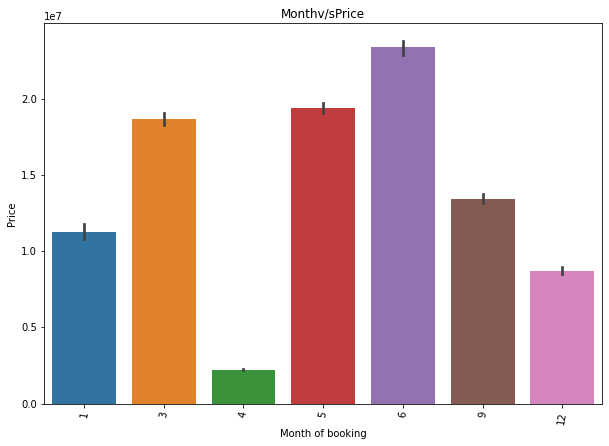

In [16]:
# Average price with compare to a particular month
plt.figure(figsize = (10,7))
v1=sns.barplot(x='journey_month', y='Price', data=airlines_train,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

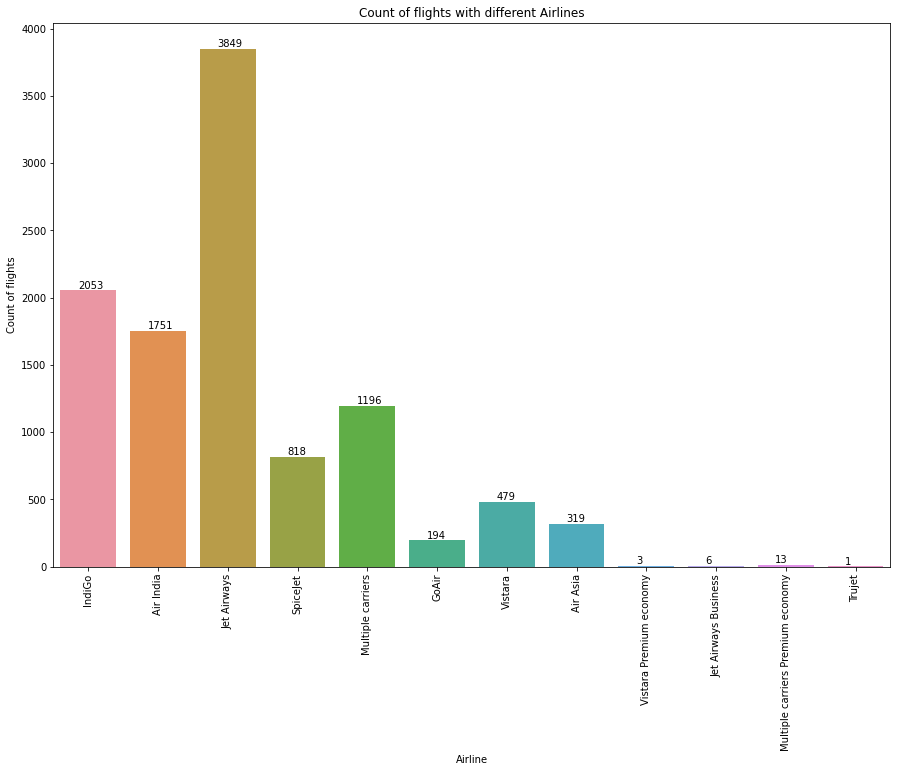

In [17]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =airlines_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [18]:
#Extracting hours and minute from the arrival and departure time columns

def extract_hrs(df,column):
    df[column+'_hrs'] = df[column].dt.hour

def extract_mins(df,column):
    df[column+'_mins'] = df[column].dt.minute
    
def drop_clmn(df,column):
    df.drop(column, axis = 1, inplace = True)

In [19]:
extract_hrs(airlines_train,'Dep_Time')
extract_mins(airlines_train,'Dep_Time')
drop_clmn(airlines_train,'Dep_Time')

In [20]:
airlines_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [21]:
extract_hrs(airlines_train,'Arrival_Time')
extract_mins(airlines_train,'Arrival_Time')
drop_clmn(airlines_train,'Arrival_Time')

In [22]:
airlines_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
duration = list(airlines_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + '0m'
        else:
            duration[i] = '0h' + duration[i]

In [24]:
airlines_train['Duration'] = duration

In [25]:
airlines_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h0m,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


<AxesSubplot:>

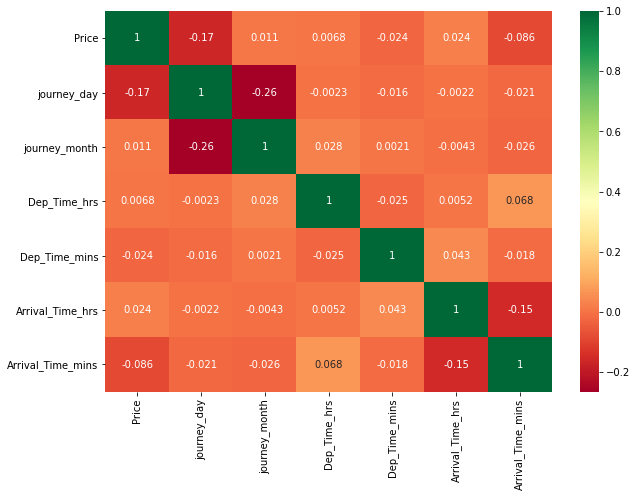

In [26]:
#Checking correlation between all the variables
plt.figure(figsize=(10,7))
sns.heatmap(airlines_train.corr(), annot=True, cmap='RdYlGn')

In [27]:
#Spliting hours and minutes from duration column and storing into new column
def hrs(x):
    return x.split(' ')[0][0:1]

def mins(x):
    return x.split(' ')[0][0:1]

In [28]:
airlines_train['duration_hrs'] = airlines_train['Duration'].apply(hrs)
airlines_train['duration_mins'] = airlines_train['Duration'].apply(mins)

In [29]:
airlines_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,6,9,9,25,4,25,1,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,4


In [30]:
drop_clmn(airlines_train,'Duration')

In [31]:
airlines_train.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hrs          int64
Dep_Time_mins         int64
Arrival_Time_hrs      int64
Arrival_Time_mins     int64
duration_hrs         object
duration_mins        object
dtype: object

In [32]:
#Converting datatypes to integer format
airlines_train['duration_hrs'] = airlines_train['duration_hrs'].astype(int)
airlines_train['duration_mins'] = airlines_train['duration_mins'].astype(int)

In [33]:
airlines_train.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hrs          int64
Dep_Time_mins         int64
Arrival_Time_hrs      int64
Arrival_Time_mins     int64
duration_hrs          int32
duration_mins         int32
dtype: object

In [34]:
#Seprating catagorical and continuous columns
cat_col = [col for col in airlines_train.columns if airlines_train[col].dtype =='object']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
categorical = airlines_train[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
cont_col = [col for col in airlines_train.columns if airlines_train[col].dtype !='object']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hrs',
 'Dep_Time_mins',
 'Arrival_Time_hrs',
 'Arrival_Time_mins',
 'duration_hrs',
 'duration_mins']

In [37]:
continuous = airlines_train[cont_col]
continuous.head()

,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,duration_hrs,duration_mins
0,3897,24,3,22,20,1,10,2,2
1,7662,5,1,5,50,13,15,7,7
2,13882,6,9,9,25,4,25,1,1
3,6218,5,12,18,5,23,30,5,5
4,13302,3,1,16,50,21,35,4,4


In [38]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

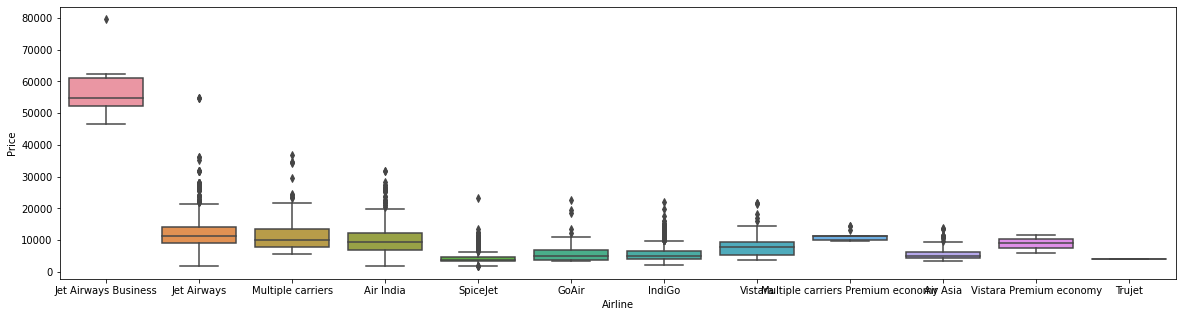

In [39]:
#Performing EDA using seaborn library
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Airline', y = 'Price', data = airlines_train.sort_values('Price',ascending = False) )

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

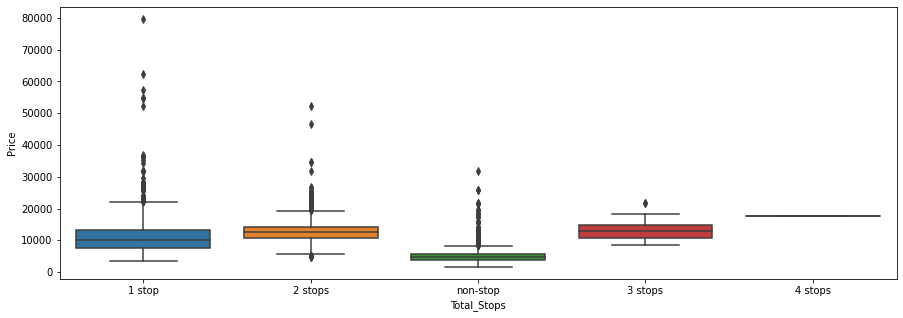

In [40]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = airlines_train.sort_values('Price',ascending = False) )

In [41]:
#Applying one-hot encoding on airline column
airline = pd.get_dummies(categorical['Airline'], drop_first = True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

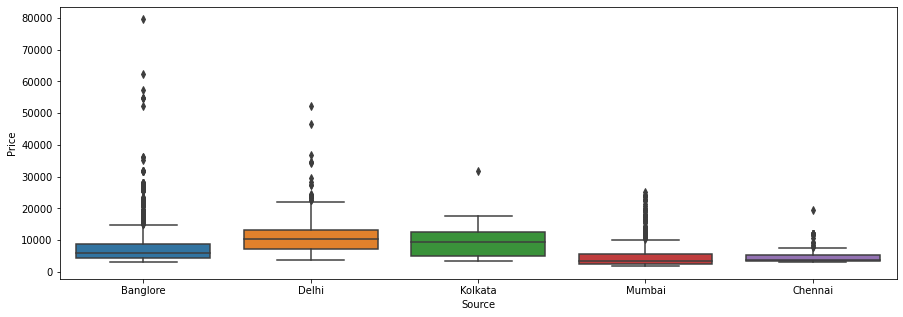

In [43]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Source', y = 'Price', data = airlines_train.sort_values('Price', ascending = False))

In [44]:
#Applying one-hot encoding on source column
source = pd.get_dummies(categorical['Source'], drop_first = True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

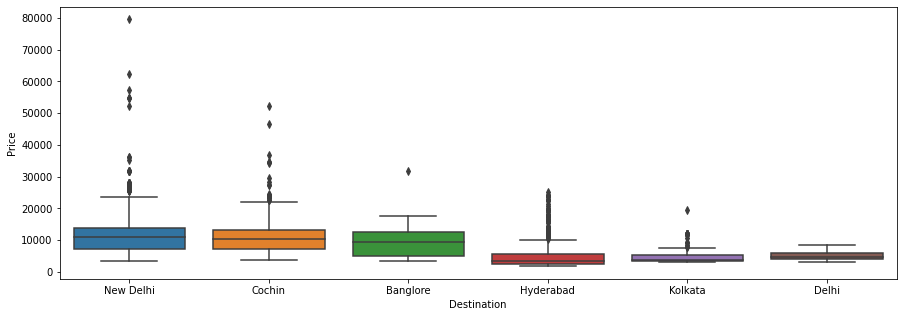

In [46]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Destination', y = 'Price', data = airlines_train.sort_values('Price', ascending = False))

In [47]:
#Applying one-hot encoding on the destination column
destination = pd.get_dummies(categorical['Destination'], drop_first = True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
#Extracting different routes
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-48-e1488ecb72f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-48-e1488ecb72f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-48-e1488ecb72f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [49]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [50]:
drop_clmn(categorical,'Route')

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [52]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [53]:
#Replacing Null values in the table with 'None'
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace = True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [55]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [56]:
from sklearn.preprocessing import LabelEncoder as LE

In [57]:
encoder = LE()

In [58]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [59]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

<ipython-input-59-16ab1ba461c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])


In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [61]:
drop_clmn(categorical, 'Additional_Info')

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [63]:
#Performing label encoding on the 'Total_Stops' column
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [64]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

<ipython-input-64-6b9ec31b02d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [66]:
train_df = pd.concat([categorical,airline,source,destination,airlines_train[cont_col]], axis = 1)
train_df.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,2
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,7
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,1,1
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,4


In [67]:
drop_clmn(train_df, 'Airline')
drop_clmn(train_df, 'Source')
drop_clmn(train_df, 'Destination')

In [68]:
train_df.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,duration_hrs,duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,2
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,7
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,1,1
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,5
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,4


In [69]:
pd.set_option('display.max_columns',35)
train_df.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,duration_hrs,duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,2
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,7
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,1,1
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,5
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,4


In [70]:
#Dealing with the outliers

def plot(df,col):
    fig, (ax1, ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col], ax = ax2)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


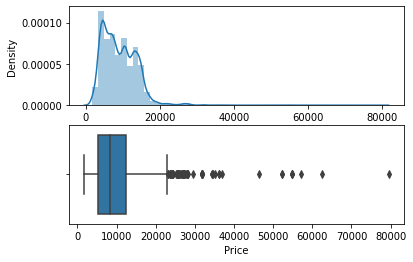

In [71]:
plot(train_df, 'Price')

In [72]:
#Replacing values higher than 40,000 as such fare for a domestic flight is charged in very rare condition
train_df['Price'] = np.where(train_df['Price'] >= 40000, train_df['Price'].median(), train_df['Price'])

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


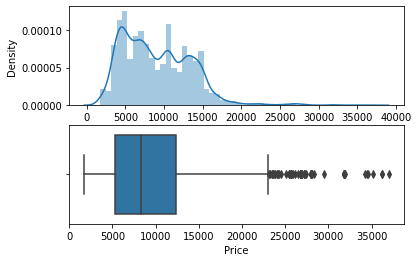

In [73]:
plot(train_df, 'Price')

In [74]:
X = train_df.drop('Price', axis = 1)
X

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,duration_hrs,duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,2
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,7
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,1,1
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,5
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,19,55,22,25,2,2
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,2
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,3,3
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,11,30,14,10,2,2


In [75]:
y = train_df['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

> Feature selection using information gain concept

In [76]:
from sklearn.feature_selection import mutual_info_classif

In [77]:
mutual_info_classif(X,y)

array([2.17963656, 2.02023024, 2.76109554, 2.28754817, 1.47096158,
       0.74904199, 0.77110202, 0.10053349, 0.66415677, 0.91481998,
       0.        , 0.54799309, 0.00508864, 0.31574444, 0.        ,
       0.22322424, 0.00758923, 0.17009653, 1.53277679, 0.90073138,
       0.28685479, 1.5095036 , 0.42076241, 0.29580257, 0.1697352 ,
       0.37950281, 1.09071129, 0.87640089, 1.43304994, 1.2026634 ,
       1.80940101, 1.54600994, 1.4019533 , 1.44616263])

In [78]:
imp_df = pd.DataFrame(mutual_info_classif(X,y), index = X.columns)
imp_df

,0
Total_Stops,2.125217
Route_1,2.039759
Route_2,2.770172
Route_3,2.307052
Route_4,1.512696
Route_5,0.679128
Air India,0.758440
GoAir,0.092494
IndiGo,0.680564
Jet Airways,0.948544


In [79]:
imp_df.columns = ['importance']
imp_df.sort_values(by = 'importance', ascending = False)

,importance
Route_2,2.770172
Route_3,2.307052
Total_Stops,2.125217
Route_1,2.039759
Arrival_Time_hrs,1.835086
Cochin,1.541079
Delhi,1.537794
Arrival_Time_mins,1.515900
Route_4,1.512696
duration_hrs,1.472019


> Splitting the dataset into train and test datasets

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [82]:
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('Testing score : {}'.format(model.score(X_test,y_test)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
          

> Implementing random forest algorithm on the dataset for prediction

In [83]:
from sklearn.ensemble import RandomForestRegressor as rfr

Training score : 0.9549615441427026
Testing score : 0.8281079300743396
predictions are: 
 [10232.112       5547.9         3637.3105     ...  3013.09433333
  4030.95        7151.41      ]


r2 score: 0.8281079300743396
MAE: 1112.453576294903
MSE: 3119185.158956509
RMSE: 1766.1215017536333


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


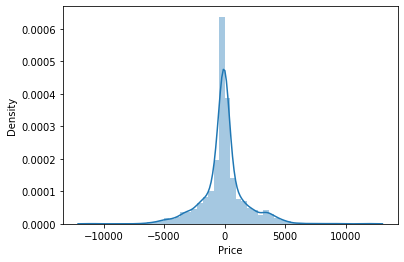

In [84]:
predict(rfr())

- Here, using the random forest model the accuracy that can be achieved is of     around 80% and training set have accuracy of 95%. This represents the overall   accuracy of this model. We can see     from the distribution plot of the       predicted price we can see that majority of   the air fare falls in between     the range less than 5,000. This shows how cheap   the domestic flights are in   India. 

###############################################################################

> Implementing decision tree model on the dataset for prediction


In [85]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()

Training score : 0.968530274877317
Testing score : 0.7428368262530451
predictions are: 
 [10262.  5823.  3570. ...  2228.  3841.  6795.]


r2 score: 0.7428368262530451
MAE: 1257.6850803306816
MSE: 4666530.313635548
RMSE: 2160.2153396445337


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


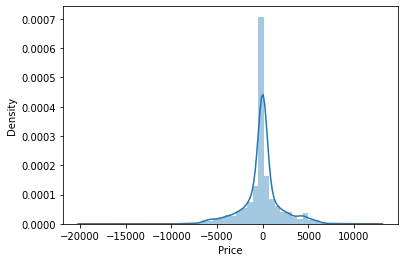

In [86]:
predict(regressor)

- Using the decision tree prediction model the accuracy acchived for training and testing dataset are 96% and 73% respectively.   Also, after implimenting the model on the dataset if we plot the distribution chart we can see here that the distribution is     more closely distributed and have low deviation in the predictions.

###############################################################################

> Implementing linear regression model on the dataset for prediction

In [87]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

Training score : 0.6138438845469129
Testing score : 0.6248482302200657
predictions are: 
 [12773.95589815  5022.63214743  4918.10303784 ...  6296.70318829
  2533.48155564 10280.24060538]


r2 score: 0.6248482302200657
MAE: 1893.3606569286255
MSE: 6807573.107705971
RMSE: 2609.132635131064


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


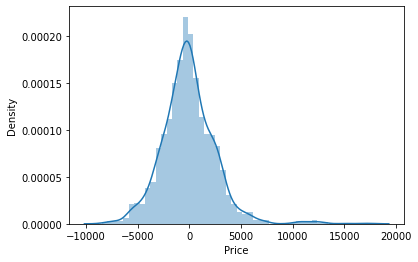

In [88]:
predict(model_1)

- As the target variable is a continuous variable it is necessary to use a regression based model. Linear rigression model is a   simple model that we can use for predicting the continuous variable. Here, the final accuracy of the model on both training     and testing dataset is of around 61% and 62% respectively. Here, the final distribution plot of the final predicted data is     more widely spread thus, we can say that there are several fluctuations are present in the final prediction.

###############################################################################

> Implementing bayesian ridge regression on the dataset for prediction

In [89]:
from sklearn.linear_model import BayesianRidge
model_1 = BayesianRidge()

Training score : 0.6136375315682563
Testing score : 0.6248575686486177
predictions are: 
 [12781.72075837  5002.87162714  4927.69980981 ...  6298.84252977
  2528.46335122 10261.67111424]


r2 score: 0.6248575686486177
MAE: 1893.2961279127044
MSE: 6807403.650861568
RMSE: 2609.100161140152


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


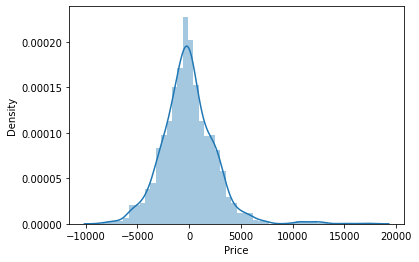

In [90]:
predict(model_1)

- Bayesian ridge regression model is somewhat simillar to the simple linear regeression, but here in this model bayes theory of occurance is used for the prediction. Here, using this model we are able to achieve the accuracy for training and test dataset around of 61% and 63% respectively which is almost similar to what we achieved using the linear regression.

###############################################################################

> Model selection and performance

- The dataset that we have used for the problem statement in hand which is predicting the fares of flights of different airlines based on the different routes and the conditions. Here in this dataset the target variable is 'airfare', whihch holds continuous data thus we need to use the regression based models for predicting this variable.

- Thus, we have ussed here four regrsssion based models which are Random forest, Decision tree, Linear regression and in the last bayesian ridge regression. 

- After implementing all the models on the dataset and comparing the accuracy of all the models we can say that randomforest and decision tree based model is the best fitted model for the given dataset and the problem statement at the hand. As the combination of accuracy that is being achieved using this two models are quite high which is around 95% and 80% for training and testing set respectively. 

- Also, if we see the distribution plot for both of the model we can observe that the predictions are closely distributed over the dataset. Thus, we can say the predictions have very less fluctuations with less standard deviation.